# MBTI Personality Classification - Modeling

This notebook loads the preprocessed data from `mbti_preprocessing.ipynb` and builds machine learning models to predict MBTI personality types.

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse
import os

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Preprocessed Data

Load the preprocessed features, labels, and fitted transformers from the preprocessing step.

In [44]:
# Load the preprocessed data
X = joblib.load('../data/processed/X_vectorized.pkl')
Y = joblib.load('../data/processed/Y_labels.pkl')
vectorizer = joblib.load('../data/processed/vectorizer.pkl')
label_encoder = joblib.load('../data/processed/label_encoder.pkl')

print(f"Features loaded: {X.shape}")
print(f"Labels loaded: {Y.shape}")
print(f"Feature matrix is sparse: {issparse(X)}")
print(f"Unique classes: {len(label_encoder.classes_)}")
print(f"Class names: {label_encoder.classes_}")

Features loaded: (8462, 98532)
Labels loaded: (8462,)
Feature matrix is sparse: True
Unique classes: 16
Class names: ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


## Data Splitting

Split the data into training and testing sets.

In [45]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")
print(f"Class distribution in training set:")
unique, counts = np.unique(Y_train, return_counts=True)
for class_idx, count in zip(unique, counts):
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"  {class_name}: {count} samples")

Training set: 6769 samples
Test set: 1693 samples
Feature dimensions: 98532
Class distribution in training set:
  ENFJ: 146 samples
  ENFP: 511 samples
  ENTJ: 180 samples
  ENTP: 532 samples
  ESFJ: 34 samples
  ESFP: 38 samples
  ESTJ: 31 samples
  ESTP: 71 samples
  INFJ: 1149 samples
  INFP: 1422 samples
  INTJ: 860 samples
  INTP: 1027 samples
  ISFJ: 131 samples
  ISFP: 213 samples
  ISTJ: 162 samples
  ISTP: 262 samples


## Model Training

Now you can start training different machine learning models. Here are some ready-to-use sections:

### Logistic Regression

Start with a simple logistic regression model:

In [46]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, Y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Training completed successfully!")

Training Logistic Regression...
Logistic Regression Accuracy: 0.4206
Training completed successfully!
Logistic Regression Accuracy: 0.4206
Training completed successfully!


c:\Users\Stijn\OneDrive - KU Leuven\UNIF\MASTER1\MACHINE LEARNING\ML_MBTI_project\mbti_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Best Model Evaluation

Detailed evaluation of the best performing model:

### Random Forest

Let's try a Random Forest model for comparison:

In [ ]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Training completed successfully!")

### Model Comparison

Compare the performance of both models:

In [ ]:
# Compare model accuracies
model_comparison = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy
}

print("Model Comparison:")
print("="*50)
for model, accuracy in model_comparison.items():
    print(f"{model:<20}: {accuracy:.4f}")

# Find best model
best_model_name = max(model_comparison, key=model_comparison.get)
best_accuracy = model_comparison[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Set the best model for evaluation
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_pred
else:
    best_model = rf_model
    best_pred = rf_pred

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.50      0.19      0.28        36
        ENFP       0.36      0.32      0.34       128
        ENTJ       0.30      0.18      0.22        45
        ENTP       0.38      0.33      0.35       133
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.44      0.53      0.48       287
        INFP       0.45      0.51      0.48       356
        INTJ       0.42      0.42      0.42       215
        INTP       0.42      0.54      0.47       257
        ISFJ       0.47      0.21      0.29        33
        ISFP       0.32      0.19      0.24        54
        ISTJ       0.33      0.17      0.23        40
        ISTP       0.52      0.35      0.42        66

    accuracy                           0.42      1693
   

c:\Users\Stijn\OneDrive - KU Leuven\UNIF\MASTER1\MACHINE LEARNING\ML_MBTI_project\mbti_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stijn\OneDrive - KU Leuven\UNIF\MASTER1\MACHINE LEARNING\ML_MBTI_project\mbti_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stijn\OneDrive - KU Leuven\UNIF\MASTER1\MACHINE LEARNING\ML_MBTI_project\mbti_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

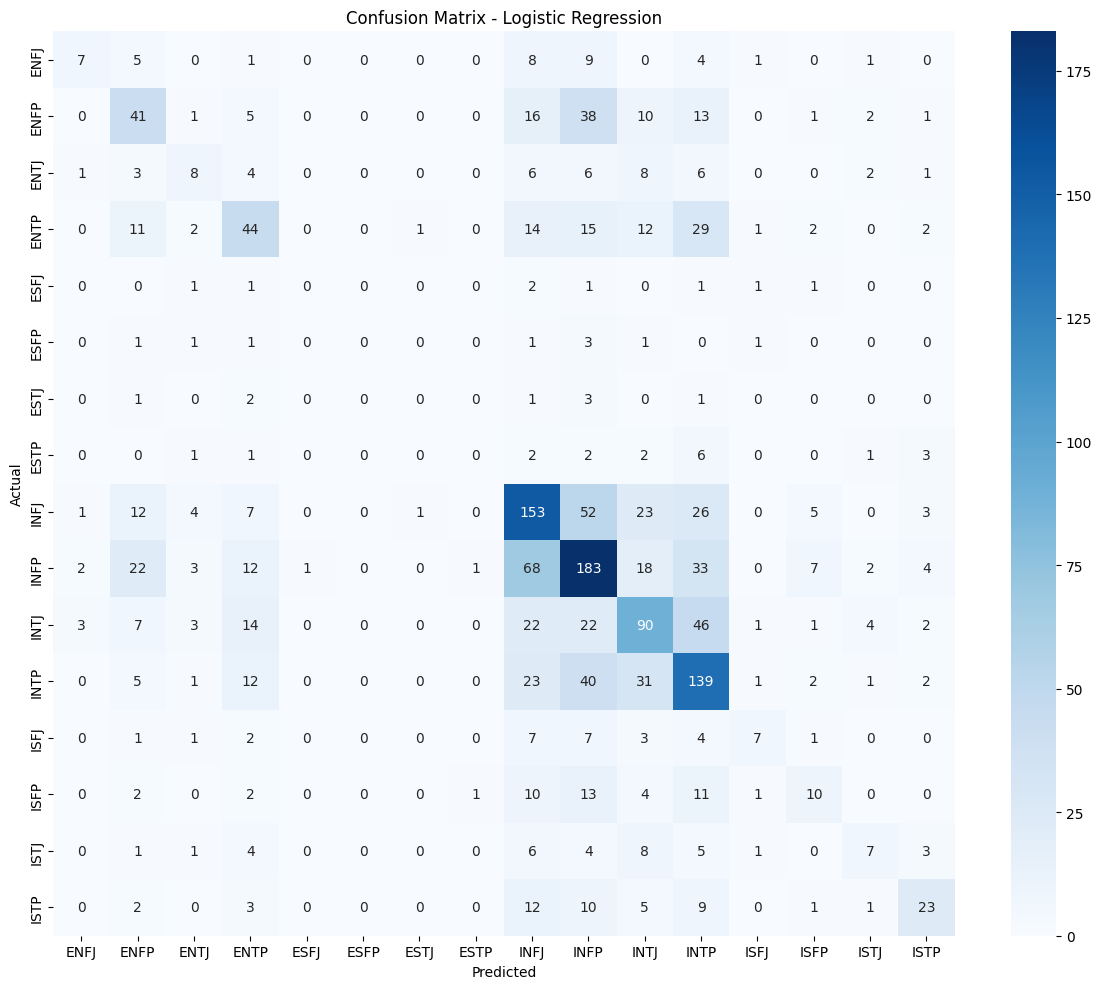

In [ ]:
# Detailed classification report for the best model
print(f"Classification Report for {best_model_name}:")
print("="*60)
print(classification_report(Y_test, best_pred, target_names=label_encoder.classes_))

# Confusion Matrix for the best model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(Y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Save Model

Save your trained model for future use:

In [ ]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the best model
model_filename = f'../models/{best_model_name.lower().replace(" ", "_")}_model.pkl'
joblib.dump(best_model, model_filename)

# Save model metadata
model_info = {
    'model_type': best_model_name,
    'accuracy': best_accuracy,
    'feature_count': X_train.shape[1],
    'training_samples': X_train.shape[0],
    'classes': label_encoder.classes_.tolist(),
    'all_model_results': model_comparison
}

joblib.dump(model_info, '../models/best_model_info.pkl')

print(f"Best model ({best_model_name}) saved to: {model_filename}")
print(f"Model info saved to: ../models/best_model_info.pkl")
print(f"Best model accuracy: {best_accuracy:.4f}")